In [8]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import networkx as nx
import queue

In [9]:
# Helper functions to work with the Maze


def printBinaryMaze(mazeGrid):
    """Display the maze corresponding to a binary grid
    Input : 2D NumPy array with 0 and 1 as elements
    Output : Simple print of the corresponding maze
    """
    (height, width) = mazeGrid.shape

    print()
    for i in range(height):
        for j in range(width):
            if mazeGrid[i, j] == 1:
                print(
                    "\u25a9", end=" "
                )  # use some other character if the unicode does not print properly
            elif mazeGrid[i, j] == 0:
                print(".", end=" ")
        print()


def showBinaryMaze(mazeGrid):
    """Display the maze corresponding to a binary grid
    Input : 2D NumPy array with 0 and 1 as elements
    Output : Heatmap grid of the corresponding maze
    """
    (height, width) = mazeGrid.shape
    mazeGrid = (
        mazeGrid * 255
    )  # just to match standard pixel values (0 to 255) in grayscale

    f = plt.figure(figsize=(width, height))
    heatmap(mazeGrid, vmin=0, vmax=255, cmap="Greys", cbar=False)


def showBinaryMazeProblem(mazeGrid, start, highlight_area=None):
    """
    Display the maze corresponding to a binary grid
    Display "start" and "goal" position on the grid
    Input : 2D NumPy array with 0 and 1 as elements
    Input : 2D coordinate of the "start" and "goal"
    Input : Optional 2D list of coordinates to highlight
    Output : Heatmap grid of the maze with markers and highlighted area
    """
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255

    mazeGrid[start[0], start[1]] = 180

    # Highlight area if provided
    if highlight_area:
        for coord in highlight_area:
            mazeGrid[coord[0], coord[1]] = 65  # Using a lighter color for highlighting

    f = plt.figure(figsize=(width, height))
    plt.imshow(mazeGrid, cmap="Greys", vmin=0, vmax=255)
    plt.axis('off')  # Turn off axis
    plt.show()

In [19]:
# Create the Maze
# 0 : empty cell, reachable within a path
# 1 : blocked cell or wall, not reachable

maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]


# Convert to a NumPy array
maze = np.array(maze)

# Print the maze using helper functions
print("Maze of dimensions", maze.shape)
printBinaryMaze(maze)

Maze of dimensions (17, 17)

▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ 
▩ . . . . . . . . . . . . . . . ▩ 
▩ . . ▩ . . . . . . . . . ▩ . . ▩ 
▩ . . . . . . . . . . . . . . . ▩ 
▩ . . . . . . . . . . . . . . . ▩ 
▩ . . . . . . . ▩ . . . . . . . ▩ 
▩ . . . . . . . . . . . . ▩ . . ▩ 
▩ . . ▩ . . . . . . . . . . . . ▩ 
▩ . . . . . . . . ▩ . . . . . . ▩ 
▩ . . . . . . . . . . . . . . . ▩ 
▩ . . . . . . . . . . . . . . . ▩ 
▩ . . . . . . ▩ . . ▩ . . . . . ▩ 
▩ . . . . . . . . . . . . . . . ▩ 
▩ . . . . . . . . . . . . . . . ▩ 
▩ . . . . . . . . . . . . . . . ▩ 
▩ . . . . . . . . . . . . . . . ▩ 
▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ 


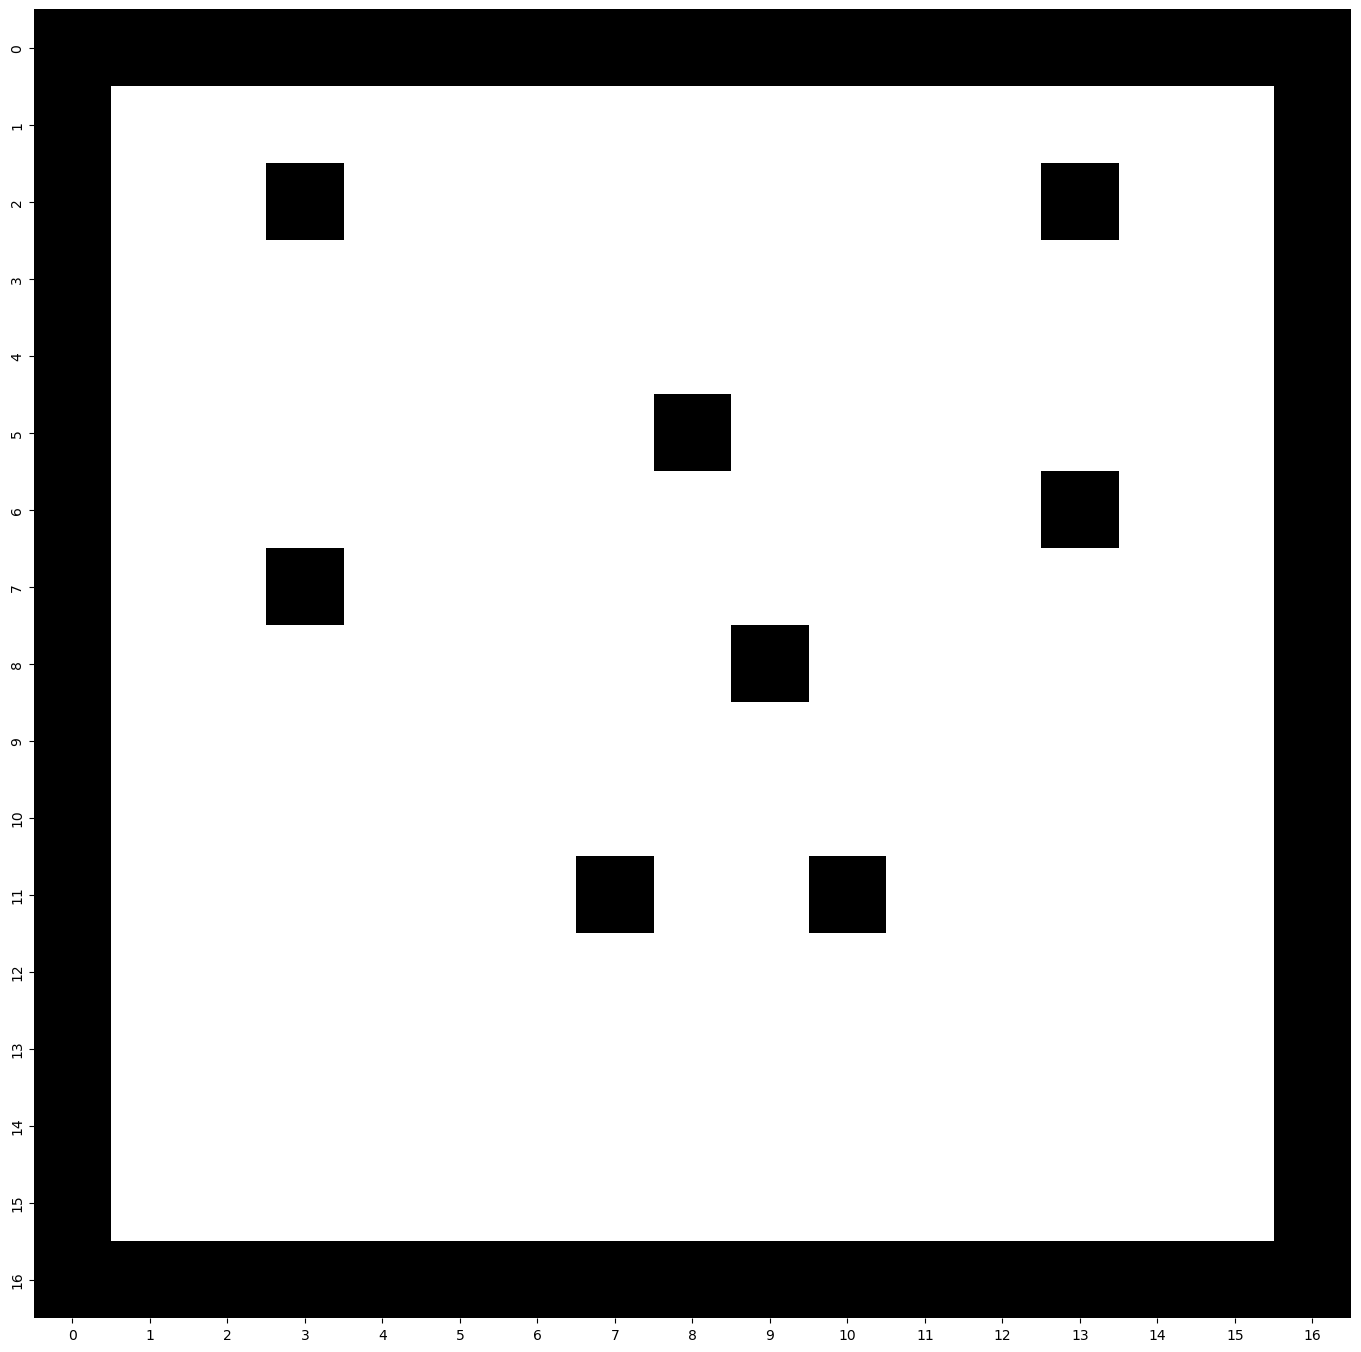

In [20]:
# Show the maze using helper functions
showBinaryMaze(maze)

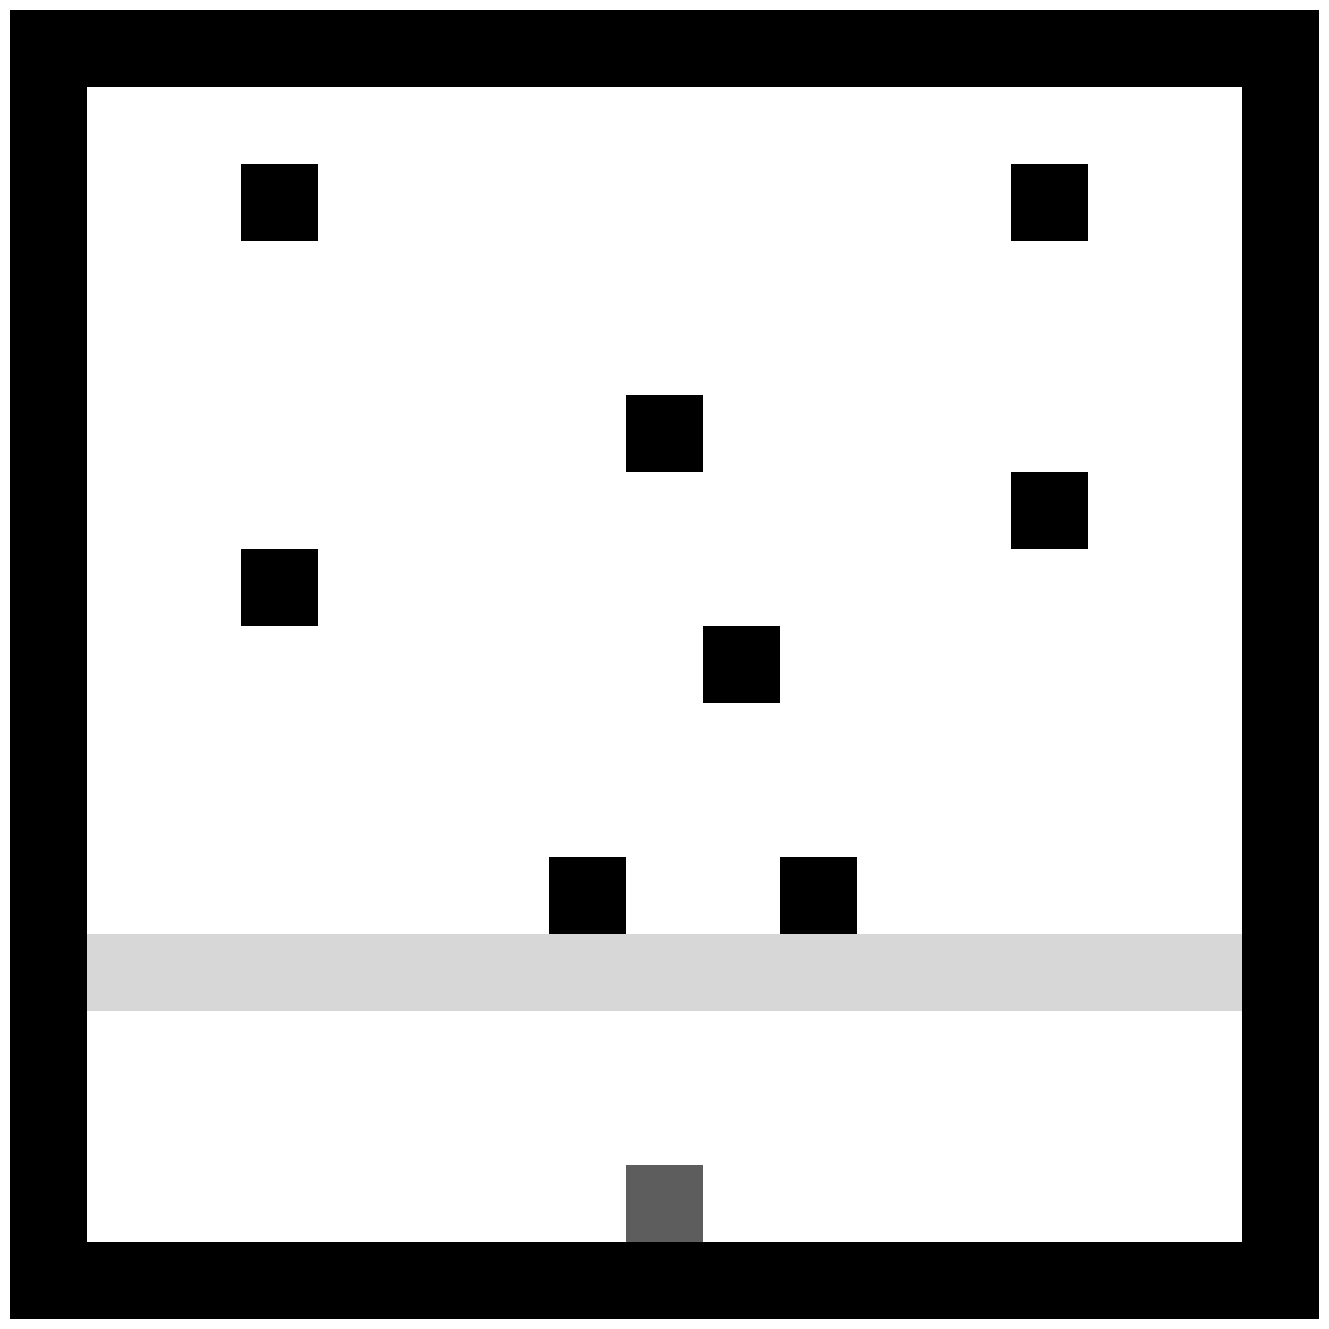

In [21]:
# Define start and goal positions
START = (15, 8)

HIGHLIGHT_AREA = highlight_area = [(12, col) for col in range(1, 16)]

# Show the maze using helper functions
showBinaryMazeProblem(maze, START, HIGHLIGHT_AREA)